# General notebook for visualizing scripts and scratches results

Compatible scripts:

DQN:
* script40


In [13]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch

def db_to_power(x):
    return 10**(x/10)
# %matplotlib inline

# Testing data

In [14]:
FILE_NAME = 'script10'
# filepath = f'D:\\Dev\\sys-simulator-2\\data\\dql\\{FILE_NAME}.pickle'
# filepath = 'D:\\Dev\\sys-simulator-2\\data\\a3c\\scratch7.pickle'
filepath = f'D:\\Dev\\sys-simulator-2\\data\\a2c\\{FILE_NAME}.pickle'
file = open(filepath, 'rb')
data = pickle.load(file)
file.close()

## MUE success rate

Text(0.5, 0, 'Number of D2D pairs')

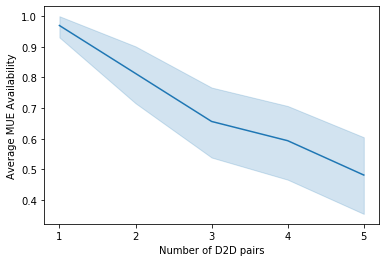

In [15]:
mue_success_rate = np.array(data['mue_success_rate'])
aux = np.ones((mue_success_rate.shape[0], np.prod(mue_success_rate.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = mue_success_rate.reshape(-1)
# dataframe
df = pd.DataFrame({'success': aux2, 'n_d2d': n_d2d})
# plot
sns.lineplot(x="n_d2d", y="success", data=df)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average MUE Availability')
plt.xlabel('Number of D2D pairs')

## MUE Spectral Efficiencies

In [16]:
data['mue_sinr_threshold']

6

Text(0.5, 0, 'Number of D2D pairs')

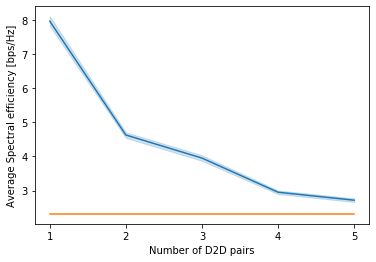

In [17]:
mue_speffs = np.array(data['mue_speffs'])
aux = np.ones((mue_speffs.shape[0], np.prod(mue_speffs.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = mue_speffs.reshape(-1)

df = pd.DataFrame({'speffs': aux2, 'n_d2d': n_d2d})
df['dummy'] = 'Spectral Efficiency'

speff_threshold = np.log2(1 + db_to_power(data['mue_sinr_threshold'])) 
baseline = speff_threshold * np.ones(mue_speffs.shape[0])

sns.lineplot(x="n_d2d", y="speffs",data=df)

plt.plot(x_ticks, baseline)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average Spectral efficiency [bps/Hz]')
plt.xlabel('Number of D2D pairs')

In [18]:
mask = mue_success_rate[4] != 1
mue_success_rate[4][mask]

array([0.25333333, 0.        , 0.1       , 0.        , 0.        ,
       0.        , 0.70666667, 0.79333333, 0.86      , 0.11333333,
       0.18666667, 0.35333333, 0.        , 0.08666667, 0.95333333,
       0.01333333, 0.21333333, 0.88      , 0.00666667, 0.17333333,
       0.        , 0.21333333, 0.86      , 0.00666667, 0.        ,
       0.        , 0.        , 0.00666667, 0.02666667, 0.82666667,
       0.        , 0.69333333, 0.07333333, 0.81333333, 0.88      ,
       0.        ])

In [19]:
mue_speffs[4][mask][3]

array([0.17402799, 0.38346994, 0.48059812, 0.37518869, 0.34866331,
       0.24259415, 0.20687532, 0.536941  , 0.25943767, 0.7251524 ,
       0.31370804, 0.30366053, 0.30404966, 0.25401028, 0.20082447,
       0.24101234, 0.71936652, 0.31219871, 0.24116398, 0.37060979,
       0.2289852 , 0.17161394, 0.27896418, 0.19518319, 0.1972765 ,
       0.64053378, 0.22007494, 0.4085073 , 0.75725607, 0.37399427,
       0.35631539, 0.52554163, 1.33163671, 0.23181635, 0.34617445,
       0.36341475, 1.87237301, 0.58468647, 0.20833179, 0.27313939,
       0.5538521 , 0.21249553, 0.42646128, 0.24655271, 0.22903378,
       0.63955939, 0.20188421, 0.22269758, 0.21404532, 0.37444656,
       0.2968836 , 0.63869206, 0.26672772, 0.21496539, 0.26026383,
       0.1900762 , 0.73314535, 0.74105451, 0.27689776, 0.24957335,
       0.33340127, 0.46550268, 0.28664119, 0.19507812, 0.53911829,
       0.1840994 , 0.35504647, 0.17657921, 0.40646198, 0.64053378,
       0.18821533, 0.41574327, 0.26271282, 0.27479836, 0.93020

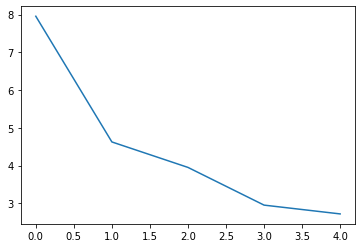

In [20]:
avgs = np.mean(mue_speffs, axis=(1,2))
plt.plot(avgs)

In [21]:
std_mue_success_rate = np.std(mue_success_rate, axis=1).tolist()
mean_mue_speffs = np.mean(mue_success_rate, axis=1).tolist()

## D2D Summed Spectral Efficiencies

Text(0.5, 0, 'Number of D2D pairs')

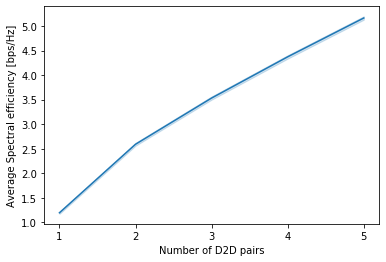

In [22]:
d2d_speffs = np.array(data['d2d_speffs'])
aux = np.ones((d2d_speffs.shape[0], np.prod(d2d_speffs.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = d2d_speffs.reshape(-1)
# dataframe
df = pd.DataFrame({'speff': aux2, 'n_d2d': n_d2d})
# plot
sns.lineplot(x="n_d2d", y="speff",data=df)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average Spectral efficiency [bps/Hz]')
plt.xlabel('Number of D2D pairs')

[1.1937191  2.5903787  3.53252633 4.37278864 5.16425552]


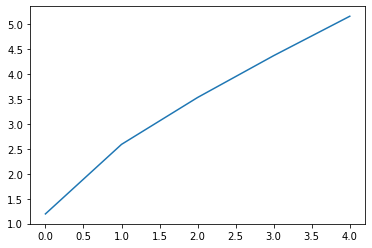

In [23]:
avgs = np.mean(d2d_speffs, axis=(1,2))
print(avgs)
plt.plot(avgs)

## Summed rewards

In [24]:
rewards = data['rewards']
plt.plot(range(1, len(mue_success_rate)+1, 1), rewards)
plt.xticks(range(1, len(mue_success_rate)+1, 1))
plt.ylabel('Average Summed Reward')
plt.xlabel('Number of D2D pairs')

ValueError: setting an array element with a sequence.